# Assignment 0 - Task 1

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
train_in = pd.read_csv('/Users/tanishakasar/Desktop/MNIST_data/data/train_in - Copy.csv', header=None).values  # Shape: (1707, 256)
train_out = pd.read_csv('/Users/tanishakasar/Desktop/MNIST_data/data/train_out - Copy.csv', header=None).values.flatten()  # Shape: (1707,)
test_in = pd.read_csv('/Users/tanishakasar/Desktop/MNIST_data/data/test_in - Copy.csv', header=None).values  # Shape: (1000, 256)
test_out = pd.read_csv('/Users/tanishakasar/Desktop/MNIST_data/data/test_out - Copy.csv', header=None).values.flatten()  # Shape: (1000,)


## Part 1

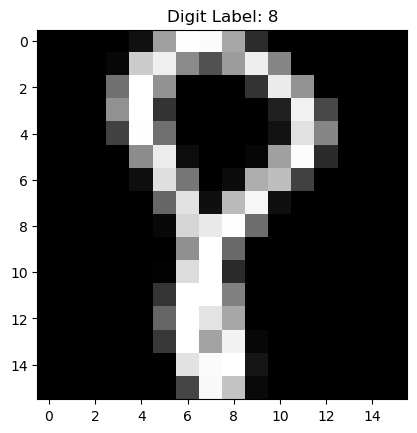

In [4]:
# Pick an index of the image you want to display
index = 54

# Get the corresponding 256-dimensional vector from train_in
image_vector = train_in[index]

# Reshape the 256-dimensional vector into a 16x16 2D array
image_2d = image_vector.reshape(16, 16)

# Plot the image
plt.imshow(image_2d, cmap='gray')
plt.title(f"Digit Label: {train_out[index]}")
plt.show()


In [5]:
print(image_2d)

[[-1.    -1.    -1.    -1.    -0.87   0.243  0.989  0.966  0.298 -0.652
  -1.    -1.    -1.    -1.    -1.    -1.   ]
 [-1.    -1.    -1.    -0.94   0.597  0.868  0.08  -0.354  0.22   0.867
   0.047 -1.    -1.    -1.    -1.    -1.   ]
 [-1.    -1.    -1.    -0.103  1.     0.147 -1.    -1.    -1.    -0.594
   0.837  0.15  -1.    -1.    -1.    -1.   ]
 [-1.    -1.    -1.     0.136  1.    -0.597 -1.    -1.    -1.    -1.
  -0.743  0.884 -0.431 -1.    -1.    -1.   ]
 [-1.    -1.    -1.    -0.48   0.987 -0.118 -1.    -1.    -1.    -1.
  -0.856  0.765  0.05  -1.    -1.    -1.   ]
 [-1.    -1.    -1.    -1.     0.098  0.848 -0.903 -1.    -1.    -0.949
   0.257  0.972 -0.657 -1.    -1.    -1.   ]
 [-1.    -1.    -1.    -1.    -0.885  0.747 -0.076 -1.    -0.908  0.355
   0.488 -0.484 -1.    -1.    -1.    -1.   ]
 [-1.    -1.    -1.    -1.    -1.    -0.201  0.77  -0.877  0.454  0.922
  -0.876 -1.    -1.    -1.    -1.    -1.   ]
 [-1.    -1.    -1.    -1.    -1.    -0.931  0.667  0.823  0.988 -0.14

In [6]:
# Initialize an empty array to store the centers for digits 0-9
digit_centers = np.zeros((10, 256))  # Shape: (10, 256)

# Compute the center for each digit
for digit in range(10):
    # Get all vectors corresponding to the current digit
    digit_vectors = train_in[train_out == digit]
    
    # Compute the mean (center) of the cloud for this digit
    digit_centers[digit] = np.mean(digit_vectors, axis=0)


In [7]:
print(digit_centers[6])

[-1.         -1.         -1.         -1.         -0.99740397 -0.96403974
 -0.87582781 -0.54606623 -0.05589404 -0.08039735 -0.56503311 -0.8775298
 -0.98039735 -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -0.98366225 -0.89762252 -0.60981457  0.03580132
  0.43695364  0.13207947 -0.49088079 -0.85521854 -0.96527815 -0.99719868
 -1.         -1.         -1.         -1.         -1.         -0.99382119
 -0.93598675 -0.70804636 -0.18144371  0.46982119  0.28945695 -0.38377483
 -0.83711921 -0.96064238 -0.98288079 -0.99484768 -1.         -1.
 -1.         -1.         -1.         -0.97091391 -0.79601325 -0.3941457
  0.269       0.43815894 -0.18125166 -0.81777483 -0.973      -0.98607947
 -0.99970199 -1.         -1.         -1.         -1.         -1.
 -0.99174834 -0.87313907 -0.58107285 -0.00582119  0.46939735  0.12623179
 -0.66872185 -0.97307947 -0.98445695 -0.98507285 -0.99522517 -1.
 -1.         -1.         -1.         -0.9985298  -0.93822517 -0.7022649
 -0.27434437 

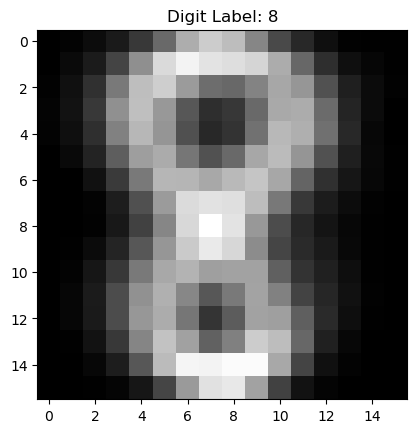

In [8]:
# Pick an index of the image you want to display, e.g., index 0 for the first image
index = 8

# Get the corresponding 256-dimensional vector from train_in
center_image_vector = digit_centers[index]

# Reshape the 256-dimensional vector into a 16x16 2D array
image_mean = center_image_vector.reshape(16, 16)

# Plot the image using matplotlib
plt.imshow(image_mean, cmap='gray')
plt.title(f"Digit Label: {index}")
plt.show()


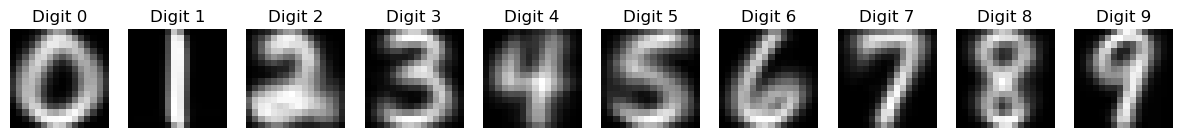

In [9]:
# Number of digits (0-9)
num_digits = 10

# Create a figure to display all digit centers
fig, axes = plt.subplots(1, num_digits, figsize=(15, 5))

# loop through each digit (0-9) and plot the center
for digit in range(num_digits):
    # Get the center vector for the current digit
    center_vector = digit_centers[digit]
    
    # Reshape the 256-dimensional vector into a 16x16 2D array
    center_image = center_vector.reshape(16, 16)
    
    # Plot the image
    axes[digit].imshow(center_image, cmap='gray')
    axes[digit].set_title(f'Digit {digit}')
    axes[digit].axis('off')  # Turn off axis

plt.show()


In [10]:
from scipy.spatial.distance import cdist

def classify_image(image, centers):
    # Compute the Euclidean distance to each center
    distances = cdist([image], centers, metric='euclidean').flatten()
    #print(distances)

    if np.argmin(distances) > 0: 
        print(np.argmin(distances))
    
    # Return the label of the closest center
    return np.argmin(distances)


In [11]:
# Classify all test images
test_predictions = np.array([classify_image(img, digit_centers) for img in test_in])

# Calculate the accuracy
accuracy = np.mean(test_predictions == test_out)
print(f"Test accuracy: {accuracy * 100:.2f}%")

2
8
5
5
4
9
2
4
6
9
8
6
4
6
6
8
2
2
8
8
6
6
9
9
2
2
2
1
2
1
6
1
2
1
5
1
6
1
8
3
6
4
8
4
1
8
4
3
4
6
1
2
6
6
6
3
4
6
8
2
1
9
9
9
9
6
6
7
7
7
7
9
9
7
6
8
2
7
6
8
1
1
1
1
6
7
6
8
1
9
8
1
8
6
8
8
4
4
4
1
3
1
6
4
1
4
1
9
6
5
2
4
1
1
1
1
8
1
7
1
1
7
1
6
2
1
8
9
4
1
1
8
1
1
1
1
1
1
1
6
3
1
2
2
1
2
1
1
6
5
4
1
8
1
1
3
1
3
8
9
1
6
9
8
9
1
6
8
8
3
6
8
5
7
1
1
7
2
8
8
7
4
9
5
2
8
8
9
1
6
9
2
7
7
8
9
9
7
5
9
7
9
1
9
6
5
4
4
4
9
4
8
8
8
3
4
1
6
1
2
7
3
4
4
6
1
1
7
5
1
3
3
3
3
9
1
6
3
7
8
7
8
4
1
1
4
9
8
7
9
4
6
1
8
9
4
2
4
3
7
6
2
3
1
7
6
4
5
6
6
8
4
8
1
9
4
3
6
1
2
4
3
8
1
4
1
4
2
6
7
6
8
1
3
9
2
5
3
5
4
4
1
4
2
1
9
3
5
5
6
9
8
8
1
9
7
1
4
2
3
2
3
1
8
3
3
6
2
3
2
6
2
5
6
6
1
2
4
3
9
6
5
1
4
4
4
3
4
2
5
8
1
2
2
6
8
5
2
1
3
2
6
4
6
1
6
7
9
9
6
6
2
2
1
4
4
1
5
1
4
6
2
6
9
4
6
9
7
4
6
2
8
3
8
3
3
4
6
9
1
8
1
4
6
3
8
2
4
6
8
9
1
1
1
4
6
1
4
4
6
5
2
4
6
2
7
8
4
6
1
4
4
7
3
1
1
1
1
2
9
2
6
9
2
3
4
6
6
8
4
7
4
1
9
6
3
8
3
5
9
9
1
9
3
3
5
4
2
3
3
9
3
2
5
3
5
4
4
9
4
9
9
4
2
4
6
4
6
3
8
4
3
2
3
2
2
7
6
4
8


In [12]:
# Compute the pairwise distance between centers
center_distances = cdist(digit_centers, digit_centers, metric='euclidean')

# Display the distance matrix
print("Pairwise distance matrix between digit centers:")
print(center_distances)

Pairwise distance matrix between digit centers:
[[ 0.         14.44960797  9.33455587  9.14373367 10.76984444  7.51929626
   8.15444313 11.86455505  9.90790174 11.48887494]
 [14.44960797  0.         10.12532258 11.7332329  10.17378643 11.11880041
  10.61470037 10.74315367 10.08677677  9.9320937 ]
 [ 9.33455587 10.12532258  0.          8.17828489  7.93254148  7.90679632
   7.33180754  8.87253107  7.07751618  8.88774785]
 [ 9.14373367 11.7332329   8.17828489  0.          9.0876078   6.11875002
   9.30206473  8.92240093  7.02042489  8.35435012]
 [10.76984444 10.17378643  7.93254148  9.0876078   0.          8.00151741
   8.78223265  7.58301228  7.38090899  6.01040793]
 [ 7.51929626 11.11880041  7.90679632  6.11875002  8.00151741  0.
   6.69869172  9.21195402  6.96738648  8.25853807]
 [ 8.15444313 10.61470037  7.33180754  9.30206473  8.78223265  6.69869172
   0.         10.8882374   8.58722228 10.44000352]
 [11.86455505 10.74315367  8.87253107  8.92240093  7.58301228  9.21195402
  10.888237

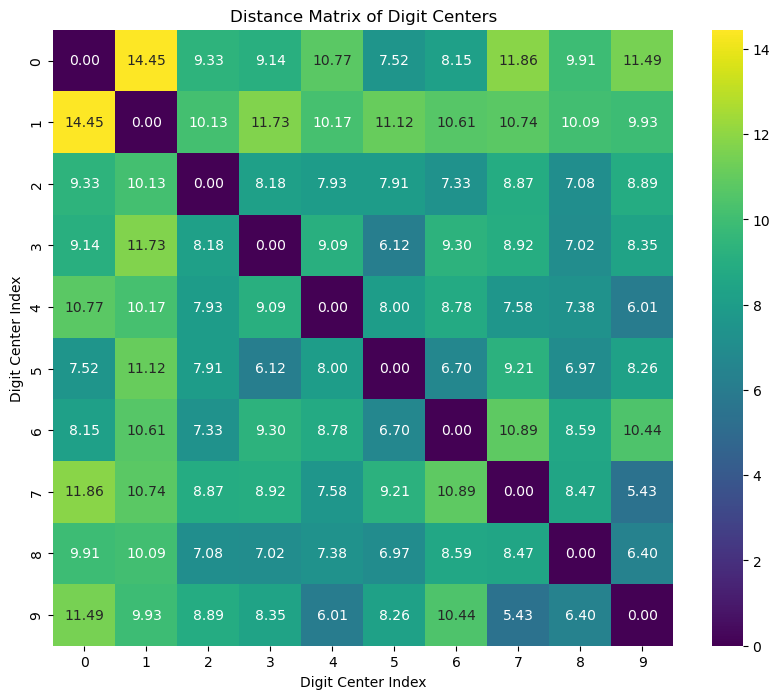

In [13]:
import seaborn as sns

# Compute the distance matrix between all digit centers
distance_matrix = cdist(digit_centers, digit_centers, metric='euclidean')

# Create a heatmap of the distance matrix
plt.figure(figsize=(10, 8))
sns.heatmap(distance_matrix, annot=True, cmap='viridis', fmt='.2f',
            xticklabels=range(10), yticklabels=range(10))
plt.title('Distance Matrix of Digit Centers')
plt.xlabel('Digit Center Index')
plt.ylabel('Digit Center Index')
plt.show()

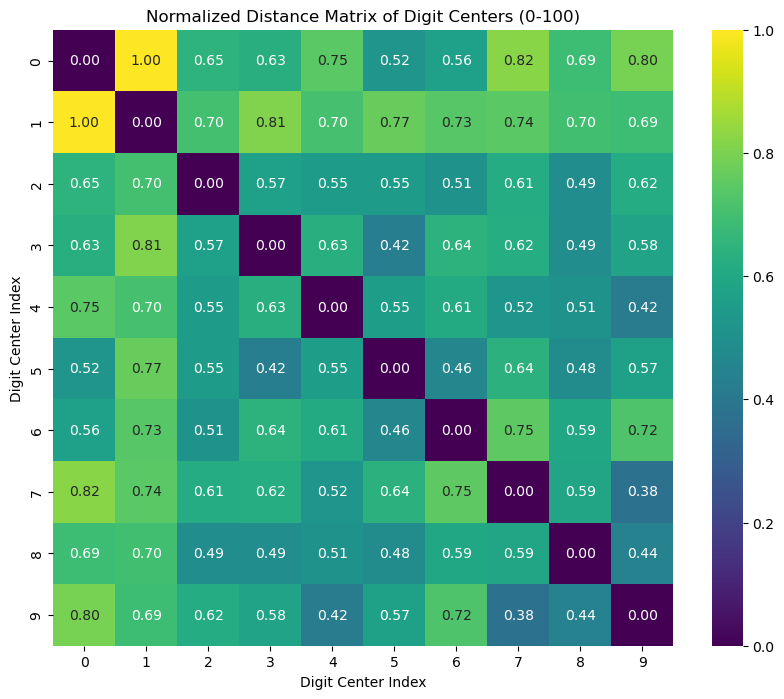

In [14]:
# Compute the distance matrix between all digit centers
distance_matrix = cdist(digit_centers, digit_centers, metric='euclidean')

# Normalize the distance matrix to the range 0-100
min_val = np.min(distance_matrix)
max_val = np.max(distance_matrix)
normalized_matrix = 1 * (distance_matrix - min_val) / (max_val - min_val)

# Create a heatmap of the normalized distance matrix
plt.figure(figsize=(10, 8))
sns.heatmap(normalized_matrix, annot=True, cmap='viridis', fmt='.2f',
            xticklabels=range(10), yticklabels=range(10))
plt.title('Normalized Distance Matrix of Digit Centers (0-100)')
plt.xlabel('Digit Center Index')
plt.ylabel('Digit Center Index')
plt.show()


In [15]:
# Count occurrences of each digit (0 through 9)
digit_counts = np.bincount(train_out, minlength=10)

# Print the number of images for each digit
for digit, count in enumerate(digit_counts):
    print(f"Digit {digit}: {count} images")


Digit 0: 319 images
Digit 1: 252 images
Digit 2: 202 images
Digit 3: 131 images
Digit 4: 122 images
Digit 5: 88 images
Digit 6: 151 images
Digit 7: 166 images
Digit 8: 144 images
Digit 9: 132 images


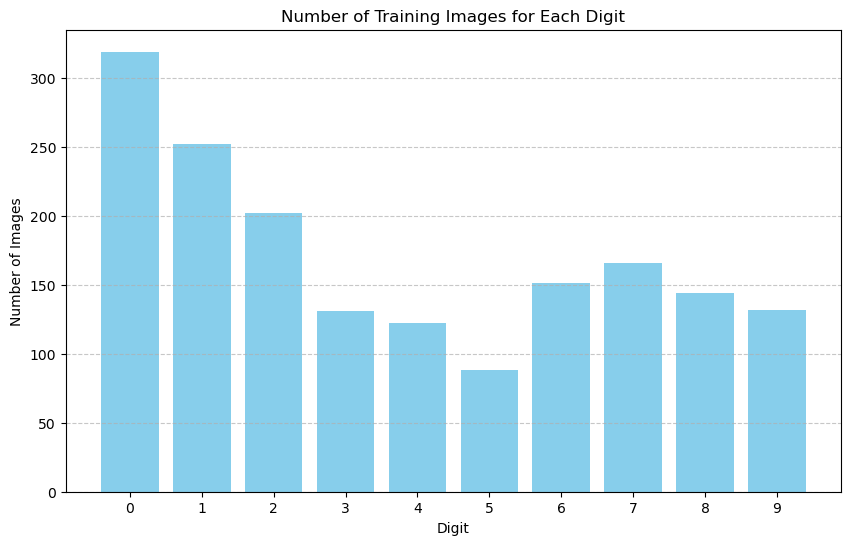

In [16]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(10), digit_counts, color='skyblue')
plt.xlabel('Digit')
plt.ylabel('Number of Images')
plt.title('Number of Training Images for Each Digit')
plt.xticks(range(10))  # Set x-ticks to be digits 0-9
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [17]:
# Initialize arrays to store counts of true positives and total occurrences for each digit
true_positives = np.zeros(10)
total_per_digit = np.zeros(10)

# Iterate over each digit to compute the counts
for digit in range(10):
    # Get indices where the true label is the current digit
    indices = np.where(test_out == digit)[0]
    
    # Count the number of correct predictions for this digit
    correct_predictions = np.sum(test_predictions[indices] == digit)
    
    # Update counts
    true_positives[digit] = correct_predictions
    total_per_digit[digit] = len(indices)

# Compute accuracy for each digit
digit_wise_accuracy = true_positives / total_per_digit * 100

# Print digit-wise accuracy
for digit, accuracy in enumerate(digit_wise_accuracy):
    print(f"Digit {digit}: {accuracy:.2f}% accuracy")

Digit 0: 79.46% accuracy
Digit 1: 99.17% accuracy
Digit 2: 68.32% accuracy
Digit 3: 77.22% accuracy
Digit 4: 80.23% accuracy
Digit 5: 69.09% accuracy
Digit 6: 86.67% accuracy
Digit 7: 78.12% accuracy
Digit 8: 79.35% accuracy
Digit 9: 77.27% accuracy


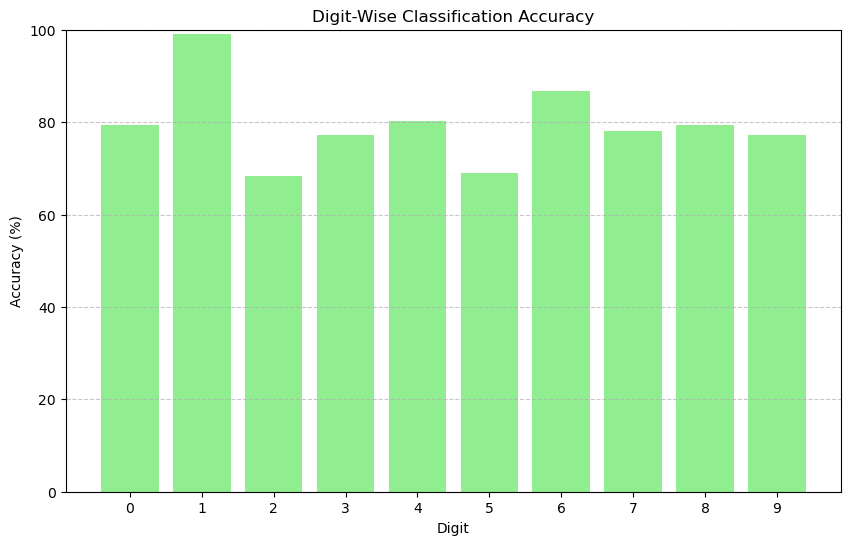

In [18]:
# Create a bar chart for digit-wise accuracy
plt.figure(figsize=(10, 6))
plt.bar(range(10), digit_wise_accuracy, color='lightgreen')
plt.xlabel('Digit')
plt.ylabel('Accuracy (%)')
plt.title('Digit-Wise Classification Accuracy')
plt.xticks(range(10))  # Set x-ticks to be digits 0-9
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100%
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


- **Confusion is probably happening with similar digits that also have a low count in the train set.**
- **For example 1 and 7 can be mistaken but because 1 has a lot of data - the confusion isnt as high**
- **7 and 9 both have less data - more confusion?**
- **1 is visually distinct and has high train data amount**

## Part 2

### PCA

In [19]:
from sklearn.decomposition import PCA

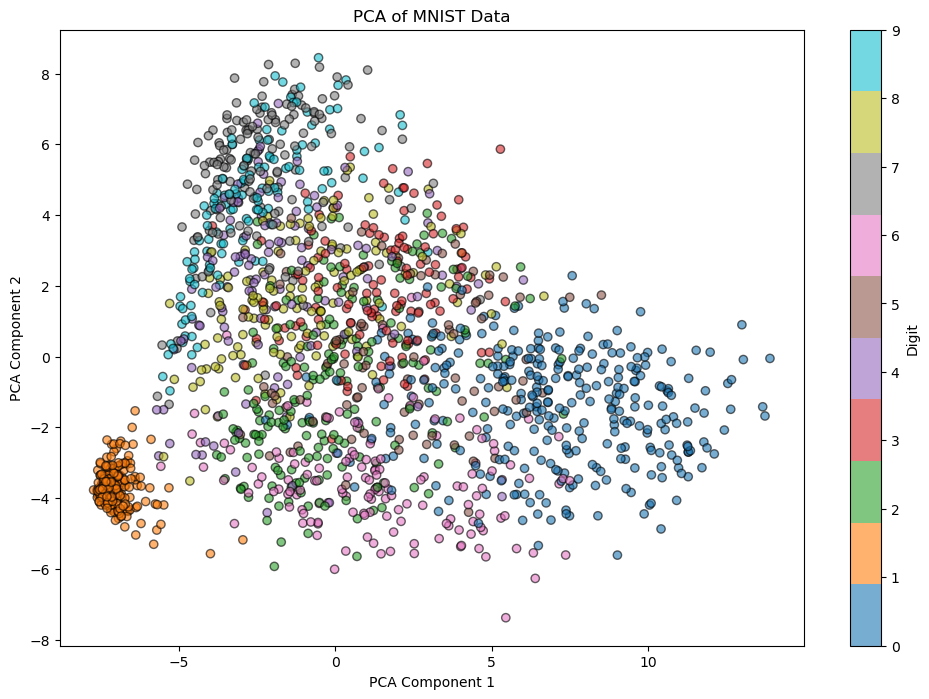

In [20]:
# Perform PCA to reduce the dimensionality to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(train_in)

# Plot PCA results
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=train_out, cmap='tab10', alpha=0.6, edgecolor='k')
plt.colorbar(scatter, ticks=range(10), label='Digit')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of MNIST Data')
plt.show()

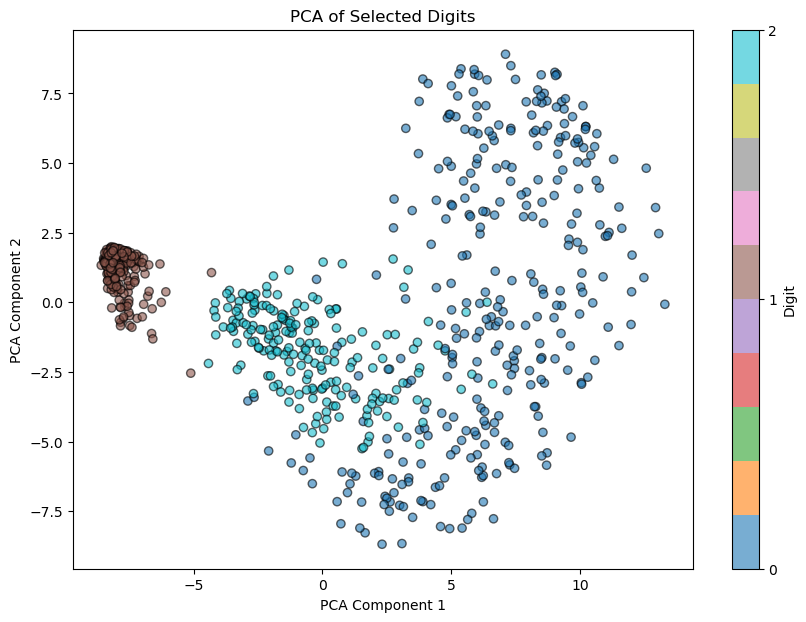

In [44]:
# Specify the digits you want to visualize
selected_digits = [0, 1, 2]

#length = selected_digits.length

# Filter the data to include only the selected digits
indices = np.isin(train_out, selected_digits)
filtered_data = train_in[indices]
filtered_labels = train_out[indices]

# Perform PCA to reduce the dimensionality to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(filtered_data)

# Plot PCA results for selected digits
plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=filtered_labels, cmap='tab10', alpha=0.6, edgecolor='k')
plt.colorbar(scatter, ticks=selected_digits, label='Digit')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Selected Digits')
plt.show()


### UMAP

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


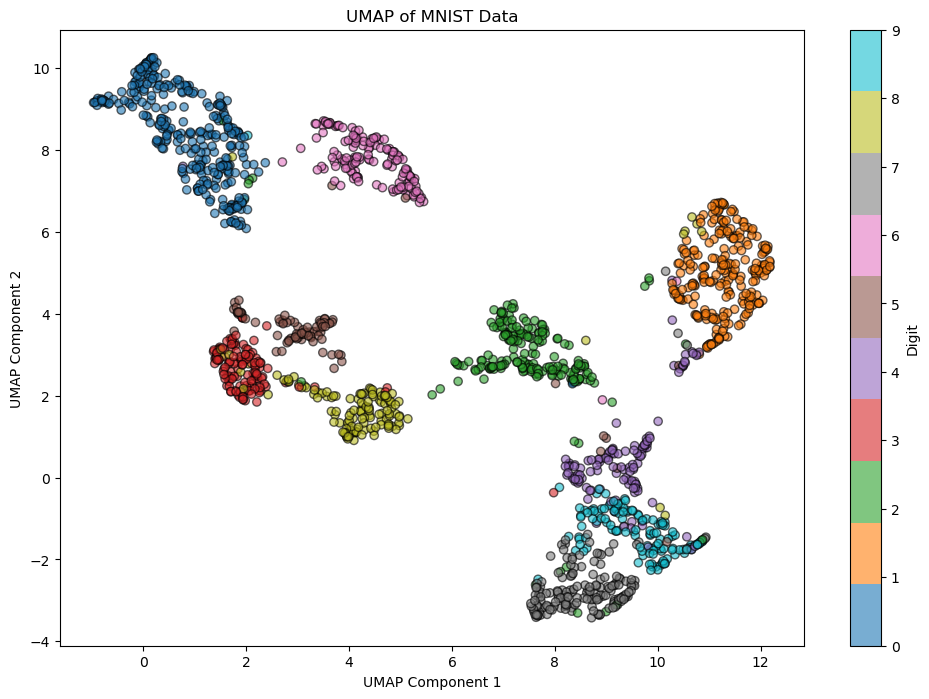

In [46]:
import umap

# Perform UMAP to reduce the dimensionality to 2D
umap_model = umap.UMAP(n_components=2)
umap_result = umap_model.fit_transform(train_in)

# Plot UMAP results
plt.figure(figsize=(12, 8))
scatter = plt.scatter(umap_result[:, 0], umap_result[:, 1], c=train_out, cmap='tab10', alpha=0.6, edgecolor='k')
plt.colorbar(scatter, ticks=range(10), label='Digit')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP of MNIST Data')
plt.show()


### T-SNE

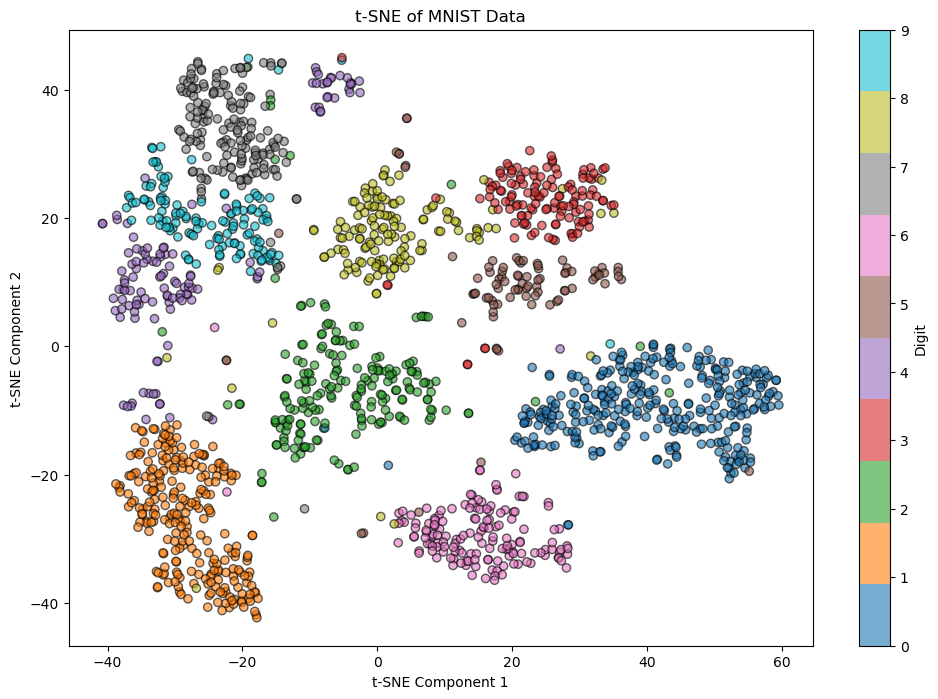

In [47]:
from sklearn.manifold import TSNE

# Perform t-SNE to reduce the dimensionality to 2D
tsne = TSNE(n_components=2, random_state=0)
tsne_result = tsne.fit_transform(train_in)

# Plot t-SNE results
plt.figure(figsize=(12, 8))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=train_out, cmap='tab10', alpha=0.6, edgecolor='k')
plt.colorbar(scatter, ticks=range(10), label='Digit')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of MNIST Data')
plt.show()


- **7,9,4 seem to cluster together**
- **PCA clustered the worst**
- **1 always distinct**
- **5 and 3 close**
- **Visualize centers?**

## Part 3

In [49]:
# Function to classify an image based on the nearest mean (center) using Euclidean distance
def nearest_mean_classifier(images, centers):
    # Compute the distances between each image and all 10 centers
    distances = cdist(images, centers, metric='euclidean')
    
    # Assign the label of the closest center (smallest distance)
    predicted_labels = np.argmin(distances, axis=1)
    
    return predicted_labels

# Calculate the accuracy
def calculate_accuracy(true_labels, predicted_labels):
    return np.mean(true_labels == predicted_labels) * 100

# Nearest mean classification on training set
train_predictions = nearest_mean_classifier(train_in, digit_centers)
train_accuracy = calculate_accuracy(train_out, train_predictions)
print(f"Training set accuracy: {train_accuracy:.2f}%")

# Nearest mean classification on test set
test_predictions = nearest_mean_classifier(test_in, digit_centers)
test_accuracy = calculate_accuracy(test_out, test_predictions)
print(f"Test set accuracy: {test_accuracy:.2f}%")


Training set accuracy: 86.35%
Test set accuracy: 80.40%


### Part 4

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the k-NN classifier with k=3 
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fit the model using the training data
knn_classifier.fit(train_in, train_out)

# Predict the labels for the training set
train_predictions_knn = knn_classifier.predict(train_in)
train_accuracy_knn = accuracy_score(train_out, train_predictions_knn)
print(f"k-NN Training set accuracy: {train_accuracy_knn * 100:.2f}%")

# Predict the labels for the test set
test_predictions_knn = knn_classifier.predict(test_in)
test_accuracy_knn = accuracy_score(test_out, test_predictions_knn)
print(f"k-NN Test set accuracy: {test_accuracy_knn * 100:.2f}%")


k-NN Training set accuracy: 97.89%
k-NN Test set accuracy: 91.40%
